# Lab 11

This lab will be a warm-up for your course project. You are asked to identify an indetersing data set and perform data collection and cleaning, exploratory data analysis, and supervised learning. You should produce a 3-page report explaining the data, what kind of analysis you performed, and showing and dicussing the main results.

**Data Selection.** For this assignment, you are not allowed to use any of the data sets you used in the previous assignments. The following is a list of pointers to interesting data sets. Please explore those links and see if there is anything that captures your imagination. You should also feel free to use Google search and find some other sources of data. You should also feel free to crawl data from internet of from deep web. Some pointers:
- Kaggle data sets: https://www.kaggle.com/datasets
- UCI Irvine Data Repository: http://archive.ics.uci.edu/ml/, http://kdd.ics.uci.edu/
- Links from Wikipedia: https://en.wikipedia.org/wiki/List_of_datasets_for_machine_learning_research
- More links: https://www.dataquest.io/blog/free-datasets-for-projects/
- More links: http://www.kdnuggets.com/datasets/index.html
- More links: https://blog.bigml.com/list-of-public-data-sources-fit-for-machine-learning/
- More links: https://www.analyticsvidhya.com/blog/2016/11/25-websites-to-find-datasets-for-data-science-projects/

**Data Analysis objective**. Regardless of which data set you select, you will have to perform exploratory data analysis (EDA) to get a deep insight into the data properties and also train a predictor for either classification or regression (it is up to you to decide what exactly you want to predict). It is up to you do decide how to perform EDA and how to define your supervised learning problem.

**Deliverables**: 
1. the ipynb file containing all the code you used to produce your results
2. A 3 page report containing the following:
 - Title and your name
 - Introduction: Explain in a few paragraphs why you selected your data set and what are your data analysis objectives
 - Methodology: Explain in detail what kind of EDA analysis you performed on your data. Explain the details of your supervised learning experiment (how you processed the data, what are the attributes, what kind of prediction model you used, and how did you evaluate its accuracy)
 - Results: a summary of your EDA results (show at least a few figures/tables providing a data insight, provide discussion of your insights) and a summary of your supervised learning results (explain the choice of hyperparameters, show the accuracies for different choices of hyperparameters and learning algorithms, and discuss how happy you are with the results)
 - Conclusion: a few sentences summarizing your study
 - References and Acknowledgements: pointers to any web source you used to finisch your assignment and acknowledging any help you obtained 

**Grading**. To get 100 points, you will have to provide a nicely commented code and a well-written report reflecting that you put a decent effort in this assignment (an equivalent of 6-10 hours of work). In this project, you can earn up to 100 EXTRA POINTS if you put a special effort, by selecting a challenging or large data set that required extra effort in data collection, data cleaning, data preprocessing, EDA, supervised learning, or if your project report and documentation is particularly well done.

In [173]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pandas.io.json import json_normalize
#from wordcloud import WordCloud, STOPWORDS
# Loading data
import datetime
import re
from sklearn.feature_extraction.text import CountVectorizer

ted = pd.read_csv("ted_main.csv")
transcripts = pd.read_csv('transcripts.csv')
print (ted.shape, transcripts.shape)


((2550, 17), (2467, 2))


In [174]:
ted.columns

Index([u'comments', u'description', u'duration', u'event', u'film_date',
       u'languages', u'main_speaker', u'name', u'num_speaker',
       u'published_date', u'ratings', u'related_talks', u'speaker_occupation',
       u'tags', u'title', u'url', u'views'],
      dtype='object')

In [175]:
ted = ted[['name', 'title', 'description', 'main_speaker', 'speaker_occupation', 'num_speaker', 'duration', 'event', 'film_date', 'published_date', 'comments', 'tags', 'languages', 'ratings', 'related_talks', 'url', 'views']]


- I rearrage the column

In [176]:
ted.columns

Index([u'name', u'title', u'description', u'main_speaker',
       u'speaker_occupation', u'num_speaker', u'duration', u'event',
       u'film_date', u'published_date', u'comments', u'tags', u'languages',
       u'ratings', u'related_talks', u'url', u'views'],
      dtype='object')

convert to human reading time

In [178]:
ted.head()

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,...,tags,languages,ratings,related_talks,url,views,film_month,pub_month,film_weekday,pub_weekday
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,2006-02-24,2006-06-26,...,"['children', 'creativity', 'culture', 'dance',...",60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110,2,6,4,0
1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,977,TED2006,2006-02-24,2006-06-26,...,"['alternative energy', 'cars', 'climate change...",43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...,3200520,2,6,4,0
2,David Pogue: Simplicity sells,Simplicity sells,New York Times columnist David Pogue takes aim...,David Pogue,Technology columnist,1,1286,TED2006,2006-02-23,2006-06-26,...,"['computers', 'entertainment', 'interface desi...",26,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/david_pogue_says_sim...,1636292,2,6,3,0
3,Majora Carter: Greening the ghetto,Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...",Majora Carter,Activist for environmental justice,1,1116,TED2006,2006-02-25,2006-06-26,...,"['MacArthur grant', 'activism', 'business', 'c...",35,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/majora_carter_s_tale...,1697550,2,6,5,0
4,Hans Rosling: The best stats you've ever seen,The best stats you've ever seen,You've never seen data presented like this. Wi...,Hans Rosling,Global health expert; data visionary,1,1190,TED2006,2006-02-21,2006-06-27,...,"['Africa', 'Asia', 'Google', 'demo', 'economic...",48,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/hans_rosling_shows_t...,12005869,2,6,1,1


In [179]:
pop_talks = ted[['title', 'main_speaker', 'views', 'film_date']].sort_values('views', ascending=False)[:15]
pop_talks

,title,main_speaker,views,film_date
0,Do schools kill creativity?,Ken Robinson,47227110,2006-02-24
1346,Your body language may shape who you are,Amy Cuddy,43155405,2012-06-25
677,How great leaders inspire action,Simon Sinek,34309432,2009-09-16
837,The power of vulnerability,Brené Brown,31168150,2010-06-05
452,10 things you didn't know about orgasm,Mary Roach,22270883,2009-02-05
1776,How to speak so that people want to listen,Julian Treasure,21594632,2013-06-09
201,My stroke of insight,Jill Bolte Taylor,21190883,2008-02-26
5,Why we do what we do,Tony Robbins,20685401,2006-02-01
2114,This is what happens when you reply to spam email,James Veitch,20475972,2015-12-07
1416,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,19787465,2012-10-26


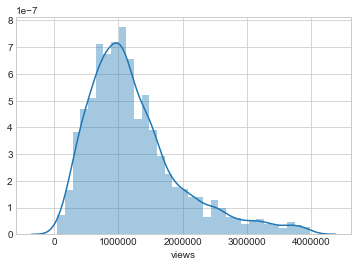

In [181]:
sns.distplot(df[df['views'] < 0.4e7]['views'])

- we will find out what video is the most dicussion base on the view

In [182]:
ted['dis_quo'] = ted['comments']/ted['views']

In [183]:
ted[['title', 'main_speaker','views', 'comments', 'dis_quo', 'film_date']].sort_values('dis_quo', ascending=False).head(10)

,title,main_speaker,views,comments,dis_quo,film_date
744,The case for same-sex marriage,Diane J. Savino,292395,649,0.002220,2009-12-01
803,E-voting without fraud,David Bismark,543551,834,0.001534,2010-07-13
96,Militant atheism,Richard Dawkins,4374792,6404,0.001464,2002-02-01
694,Inside a school for suicide bombers,Sharmeen Obaid-Chinoy,1057238,1502,0.001421,2010-02-09
954,Taking imagination seriously,Janet Echelman,1832930,2492,0.001360,2011-03-02
840,On reading the Koran,Lesley Hazleton,1847256,2374,0.001285,2010-10-09
876,Curating humanity's heritage,Elizabeth Lindsey,439180,555,0.001264,2010-12-07
1787,How do you explain consciousness?,David Chalmers,2162764,2673,0.001236,2014-03-17
661,The danger of science denial,Michael Specter,1838628,2272,0.001236,2010-02-10
561,Dance to change the world,Mallika Sarabhai,481834,595,0.001235,2009-11-03


In [184]:
ted['ratings'].head()

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings, dtype: object

In [185]:
print (ted.shape, transcripts.shape)

((2550, 22), (2467, 2))


In [186]:
# Categorize events into TED and TEDx; exclude those that are non-TED events
ted = ted[ted['event'].str[0:3]=='TED'].reset_index()
ted.loc[:,'event_cat'] = ted['event'].apply(lambda x: 'TEDx' if x[0:4]=='TEDx' else 'TED')

print ("No. of talks remain: ", len(ted))

('No. of talks remain: ', 2439)


In [188]:
ted['ratings']=ted['ratings'].str.replace("'",'"')
ted=ted.merge(ted.ratings.apply(lambda x: pd.Series(pd.read_json(x)['count'].values,index=pd.read_json(x)['name'])), 
            left_index=True, right_index=True)

In [189]:
Positive = ['Beautiful', 'Courageous', 'Fascinating', 'Funny', 'Informative', 'Ingenious', 'Inspiring', 'Jaw-dropping', 'Persuasive']
Negative = ['Confusing', 'Longwinded', 'Obnoxious', 'Unconvincing']
ted['positive']=ted.loc[:,Positive].sum(axis=1)+1
ted['negative']=ted.loc[:,Negative].sum(axis=1)+1
ted['pop_ratio']=ted['positive']/ted['negative']
ted.loc[:,'Popular'] = ted['pop_ratio'].apply (lambda x: 1 if x >5 else 0)

print ("No. of Not Popular talks: ", len(ted[ted['Popular']==0]))
# print ("Ratio of Popular talks: {:.4f}".format(len(ted[ted['Popular']==1])/ float(len(ted))))
print ("Ratio of Popular talks: {:.4f}".format(np.mean(ted.Popular)))

('No. of Not Popular talks: ', 301)
Ratio of Popular talks: 0.8766


In [101]:
occupation = ted.groupby('speaker_occupation').count().reset_index()[['speaker_occupation', 'comments']]
occupation.columns = ['occupation', 'appearances']
occupation = occupation.sort_values('appearances', ascending=False)

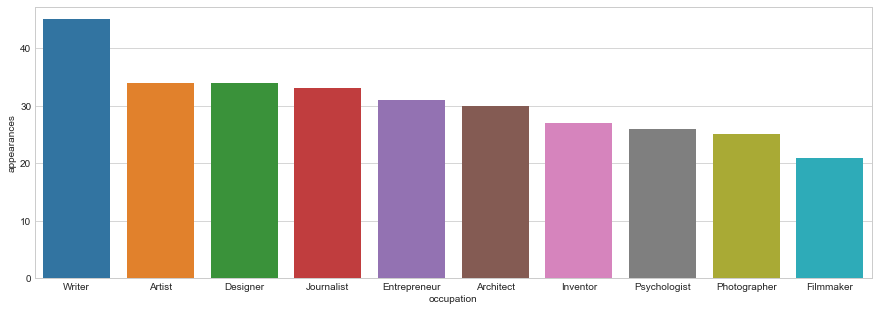

In [102]:
plt.figure(figsize=(15,5))
sns.barplot(x='occupation', y='appearances', data=occupation.head(10))
plt.show()

In [110]:
import ast
ted['tags'] = ted['tags'].apply(lambda x: ast.literal_eval(x))

In [111]:
s = ted.apply(lambda x: pd.Series(x['tags']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'theme'

In [112]:
theme = ted.drop('tags', axis=1).join(s)
theme.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,Ingenious,Inspiring,Jaw-dropping,Longwinded,OK,Obnoxious,Persuasive,Unconvincing,single_speaker,theme
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-24,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-26,...,6073,24924,4439,387,1174,209,10704,300,1,children
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-24,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-26,...,6073,24924,4439,387,1174,209,10704,300,1,creativity
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-24,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-26,...,6073,24924,4439,387,1174,209,10704,300,1,culture
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-24,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-26,...,6073,24924,4439,387,1174,209,10704,300,1,dance
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-24,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-26,...,6073,24924,4439,387,1174,209,10704,300,1,education


In [113]:
theme.shape

(19154, 36)

In [114]:
len(theme['theme'].value_counts())

416

In [116]:
pop_themes = pd.DataFrame(theme['theme'].value_counts()).reset_index()
pop_themes.columns = ['theme', 'talks']
pop_themes.head(10)

,theme,talks
0,technology,727
1,science,567
2,global issues,501
3,culture,486
4,TEDx,450
5,design,418
6,business,348
7,entertainment,299
8,health,236
9,innovation,229


In [121]:
transcripts = pd.read_csv('transcripts.csv')
transcripts.head()

,transcript,url
0,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...
1,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...
2,"(Music: ""The Sound of Silence,"" Simon & Garfun...",https://www.ted.com/talks/david_pogue_says_sim...
3,If you're here today — and I'm very happy that...,https://www.ted.com/talks/majora_carter_s_tale...
4,"About 10 years ago, I took on the task to teac...",https://www.ted.com/talks/hans_rosling_shows_t...


In [122]:
total = pd.merge(left=ted,right=transcripts, how='left', left_on='url', right_on='url')
total.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,Ingenious,Inspiring,Jaw-dropping,Longwinded,OK,Obnoxious,Persuasive,Unconvincing,single_speaker,transcript
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-24,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-26,...,6073,24924,4439,387,1174,209,10704,300,1,Good morning. How are you?(Laughter)It's been ...
1,265,With the same humor and humanity he exuded in ...,977,TED2006,2006-02-24,43,Al Gore,Al Gore: Averting the climate crisis,1,2006-06-26,...,56,413,116,113,203,131,268,258,1,"Thank you so much, Chris. And it's truly a gre..."
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,2006-02-23,26,David Pogue,David Pogue: Simplicity sells,1,2006-06-26,...,183,230,54,78,146,142,230,104,1,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,2006-02-25,35,Majora Carter,Majora Carter: Greening the ghetto,1,2006-06-26,...,105,1070,230,53,85,35,460,36,1,If you're here today — and I'm very happy that...
4,593,You've never seen data presented like this. Wi...,1190,TED2006,2006-02-21,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,2006-06-27,...,3202,2893,3736,110,248,61,2542,67,1,"About 10 years ago, I took on the task to teac..."


In [124]:
total['transcript'] = total['transcript'].fillna('')
total['wc'] = total['transcript'].apply(lambda x: len(x.split()))

In [125]:
total['wc'].describe()

count    2553.000000
mean     1971.548374
std      1009.493145
min         0.000000
25%      1235.000000
50%      1983.000000
75%      2681.000000
max      9044.000000
Name: wc, dtype: float64

In [129]:
total['wpm'] = total['wc']/total['duration']
total['wpm'].describe()

count    2553.000000
mean        2.369126
std         0.660587
min         0.000000
25%         2.184486
50%         2.483636
75%         2.749744
max         4.122748
Name: wpm, dtype: float64

In [218]:
count_vector = CountVectorizer(stop_words='english',min_df=20/len(ted)) # Only keep those with 20 or more occurrences
tag_array = count_vector.fit_transform(ted.tags).toarray()
tag_matrix = pd.DataFrame(tag_array, columns = count_vector.get_feature_names())
all_tags = tag_matrix.columns
tag_matrix = pd.concat([tag_matrix, ted.Popular], axis=1)

In [219]:
print tag_array

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


In [244]:
tag_matrix.head()

,3d,activism,addiction,adventure,advertising,africa,aging,agriculture,ai,aids,...,wind,women,word,work,world,writing,wunderkind,york,youth,Popular
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [222]:
print tag_array

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


In [229]:
tag_array.shape

(2439, 434)

In [230]:
X=tag_array[:,:-1]

In [231]:
X.shape

(2439, 433)

In [232]:
y=tag_array[:,433]

In [233]:
print y.shape

(2439,)


In [234]:
#Supervised Learning
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)

/Users/chaunguyen/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [237]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, yhat)

array([[795,   0],
       [ 10,   0]])

In [241]:
#record now time
#start_time = time.time()
from sklearn.tree import DecisionTreeClassifier
predictor = DecisionTreeClassifier(criterion="entropy", max_depth=10, max_leaf_nodes=20)
predictor.fit(X_train, y_train);
# select all test examples/
i = np.arange(X_test.shape[0])
i[0:X_test.shape[0]]
x = X_test[i,:]
# predict its label
yhat = predictor.predict(x)
accuracy = predictor.score(X_test,y_test)
print "Accuracy: ", accuracy

Accuracy:  0.986335403727


In [242]:
confusion_matrix(y_test, yhat)

array([[794,   1],
       [ 10,   0]])